## Setup

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import os
import time
import json
from tqdm import tqdm
from datasets import load_dataset, concatenate_datasets

import config
from utils import *

os.environ['OPENAI_API_KEY'] = config.OPENAI_API_KEY

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import openai
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

from nltk.translate.bleu_score import SmoothingFunction, sentence_bleu
from repl.server import LeanServer, RobustLeanServer

## Stats and plots functions

In [12]:
def load_data(file_name = "baseline_direct_translation_gpt-4o_eval2"):
    json_file_path = '/home/agatha/Desktop/MA3/sem proj/autoformalization_with_hypothesis/results/evaluations/'+file_name+'.json'
    with open(json_file_path, 'r') as f:
        data = json.load(f)

    df = pd.DataFrame(data)
    return df

In [13]:
def avg_bleu_cossim(df):
    average_bleu = df['bleu'].mean()
    average_cosine_similarity = df['cosine_similarity'].mean()

    print(f"Average BLEU score: {average_bleu}")
    print(f"Average Cosine Similarity: {average_cosine_similarity}")

    df[['bleu', 'cosine_similarity']].hist(bins=20, figsize=(12, 6), layout=(1, 2), edgecolor='black')
    plt.show()

In [14]:
def num_repl_errors(df):
    df['num_repl_errors'] = df['repl_errors'].apply(len)


    plt.figure(figsize=(10, 6))
    plt.hist(df['num_repl_errors'], bins=range(0, 26), edgecolor='black')
    plt.xlabel('Number of REPL Errors')
    plt.ylabel('Frequency')
    plt.xlim(0, 10)

    plt.show()

In [15]:
def tc_bleu(df):
    df['num_repl_errors'] = df['repl_errors'].apply(len)
    df['TC-BLEU'] = df.apply(lambda row: 0 if row['num_repl_errors'] > 0 else row['bleu'], axis=1)

    average_tc_bleu = df['TC-BLEU'].mean()
    print(f"Average TC-BLEU score: {average_tc_bleu}")

    df['TC-BLEU'].hist(bins=20, edgecolor='black')
    plt.xlabel('TC-BLEU Score')
    plt.ylabel('Frequency')
    plt.show()

In [16]:
def stats(df):
    df['num_repl_errors'] = df['repl_errors'].apply(len)
    df['TC-BLEU'] = df.apply(lambda row: 0 if row['num_repl_errors'] > 0 else row['bleu'], axis=1)
    average_tc_bleu = df['TC-BLEU'].mean()

    repl_count = df['repl'].sum()
    beq_count = df['beq'].sum()
    N = len(df)

    repl_percentage = (repl_count / len(df)) * 100
    beq_percentage = (beq_count / len(df)) * 100

    print(f"Average TC-BLEU score: {average_tc_bleu:.2f}")
    print(f"Number of statements that type ckeck: {repl_count} / {N} : {repl_percentage:.2f}%")
    print(f"Number of equivalent (BEq) pairs: {beq_count} / {N} : {beq_percentage:.2f}%\n")

    

## Comparison

In [19]:
experiments = [
    "baseline_direct_translation_gpt-4o_eval2",
    "direct_translation_with_general_fewshot_gpt-4o_eval2", 
    "base_hypothesis_decomp_gpt-4o_eval2",
    "hyp_decomp_leansearch_gpt-4o-2024-11-20_eval2",
    "baseline_leansearch_top5_gpt-4o-2024-11-20_eval2",
    "baseline_leansearch_top3_gpt-4o-2024-11-20_eval2"
    ]

for experiment in experiments:
    print(f"Experiment: {experiment}")
    df = load_data(experiment)
    stats(df)

Experiment: baseline_direct_translation_gpt-4o_eval2
Average TC-BLEU score: 0.18
Number of statements that type ckeck: 101 / 234 : 43.16%
Number of equivalent (BEq) pairs: 46 / 234 : 19.66%

Experiment: direct_translation_with_general_fewshot_gpt-4o_eval2
Average TC-BLEU score: 0.20
Number of statements that type ckeck: 110 / 234 : 47.01%
Number of equivalent (BEq) pairs: 48 / 234 : 20.51%

Experiment: base_hypothesis_decomp_gpt-4o_eval2
Average TC-BLEU score: 0.17
Number of statements that type ckeck: 89 / 234 : 38.03%
Number of equivalent (BEq) pairs: 45 / 234 : 19.23%

Experiment: hyp_decomp_leansearch_gpt-4o-2024-11-20_eval2
Average TC-BLEU score: 0.20
Number of statements that type ckeck: 123 / 234 : 52.56%
Number of equivalent (BEq) pairs: 52 / 234 : 22.22%

Experiment: baseline_leansearch_top5_gpt-4o-2024-11-20_eval2
Average TC-BLEU score: 0.20
Number of statements that type ckeck: 127 / 234 : 54.27%
Number of equivalent (BEq) pairs: 49 / 234 : 20.94%

Experiment: baseline_leans

In [20]:
experiments = ["ADV_"+experiment for experiment in experiments]

for experiment in experiments:
    print(f"Experiment: {experiment}")
    df = load_data(experiment)
    stats(df)

Experiment: ADV_baseline_direct_translation_gpt-4o_eval2


FileNotFoundError: [Errno 2] No such file or directory: '/home/agatha/Desktop/MA3/sem proj/autoformalization_with_hypothesis/results/evaluations/ADV_baseline_direct_translation_gpt-4o_eval2.json'

In [9]:
raise ValueError

ValueError: 

## Baseline

Average BLEU score: 0.26538502712401885
Average Cosine Similarity: 0.8953934560493993


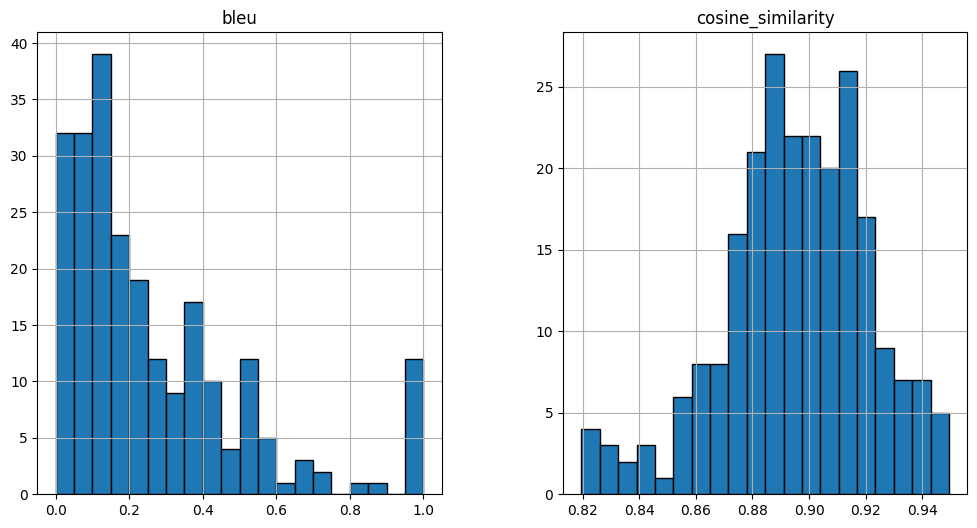

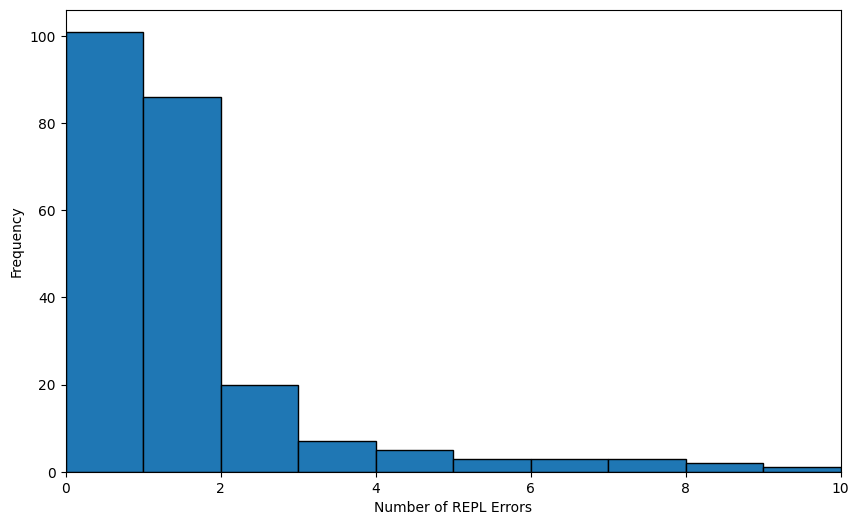

Average TC-BLEU score: 0.1771904067417364


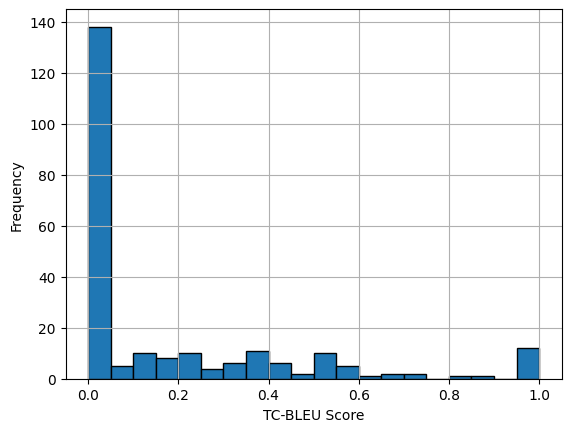

Number of statements that type ckeck: 101 / 234 : 43.16%
Number of equivalent (BEq) pairs: 46 / 234 : 19.66%


In [39]:
df = load_data("baseline_direct_translation_gpt-4o_eval2")
avg_bleu_cossim(df)
num_repl_errors(df)
tc_bleu(df)
repl_beq(df)


## Fewshot

Average BLEU score: 0.271397929512879
Average Cosine Similarity: 0.8924129574756129


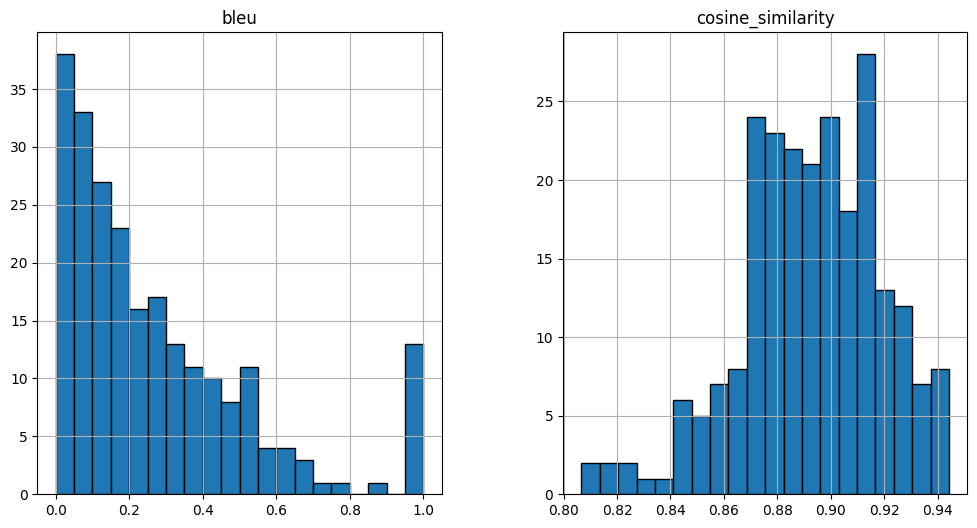

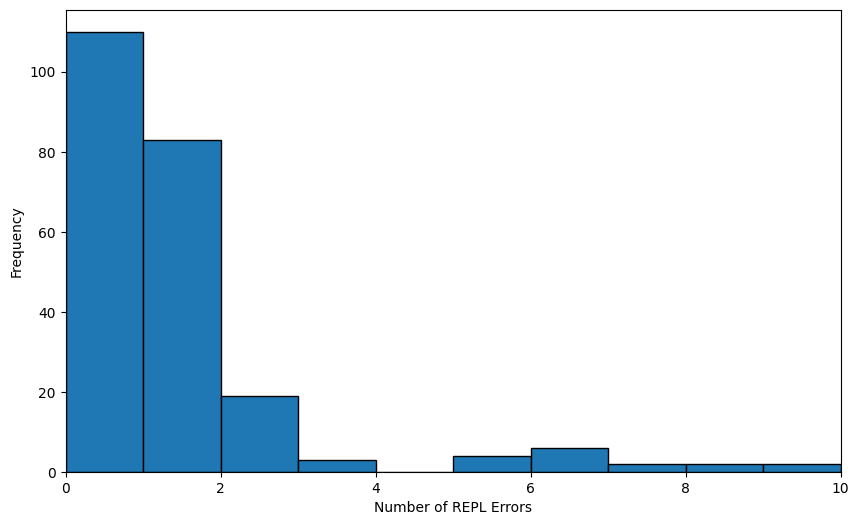

Average TC-BLEU score: 0.1953473869945451


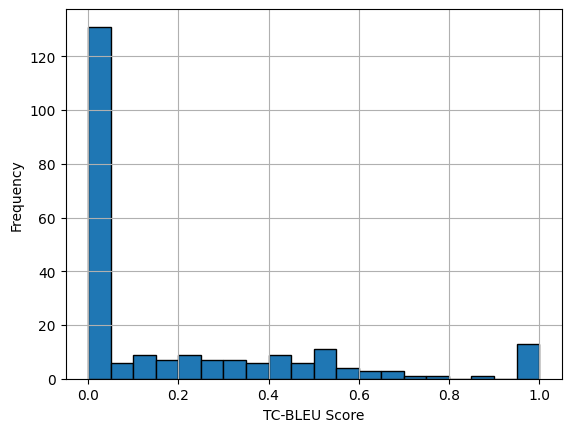

Number of statements that type ckeck: 110 / 234 : 47.01%
Number of equivalent (BEq) pairs: 48 / 234 : 20.51%


In [40]:
df = load_data("direct_translation_with_general_fewshot_gpt-4o_eval2")
avg_bleu_cossim(df)
num_repl_errors(df)
tc_bleu(df)
repl_beq(df)


## Informal hypothesis decomp

Average BLEU score: 0.26032641125610867
Average Cosine Similarity: 0.8969824945442013


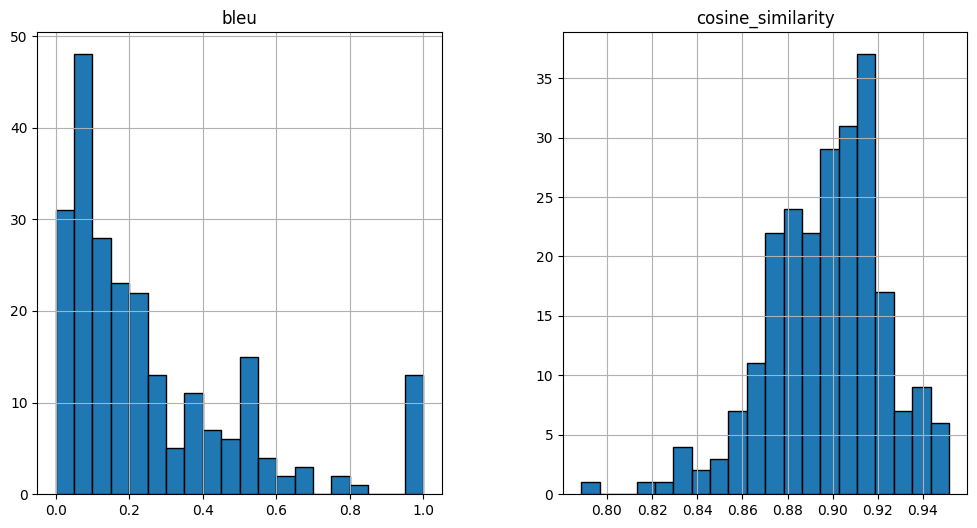

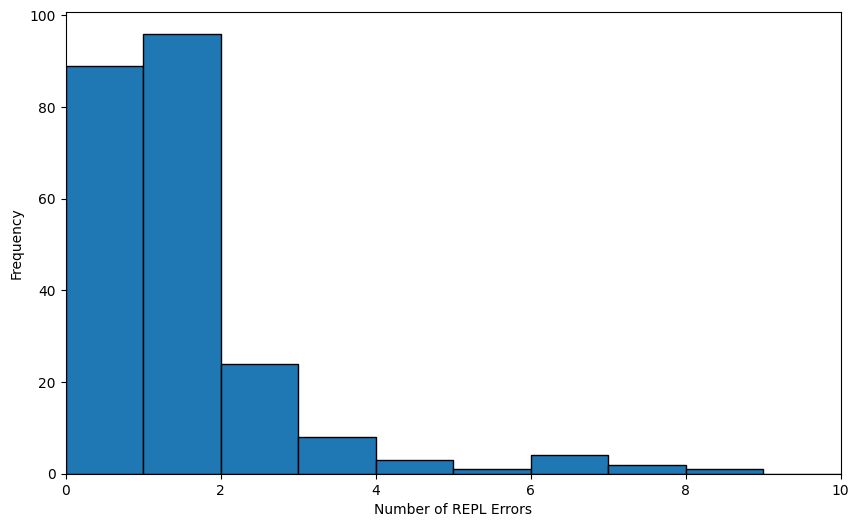

Average TC-BLEU score: 0.16520706418538916


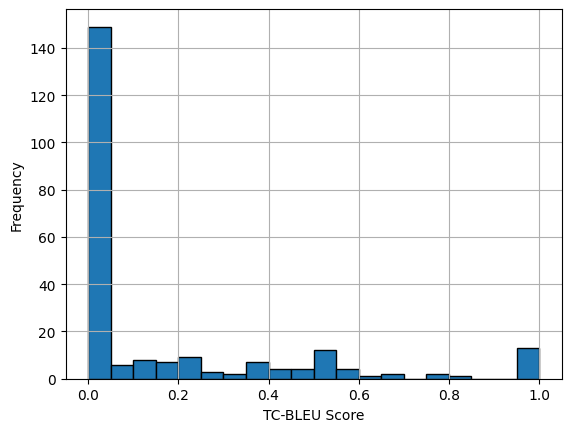

Number of statements that type ckeck: 89 / 234 : 38.03%
Number of equivalent (BEq) pairs: 45 / 234 : 19.23%


In [41]:
df = load_data("base_hypothesis_decomp_gpt-4o_eval2")
avg_bleu_cossim(df)
num_repl_errors(df)
tc_bleu(df)
repl_beq(df)
